# **Task 1: TITANIC SURVIVAL PREDICTION**

### Importing all necessary libraries

In [234]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Importing the csv file

In [235]:
df = pd.read_csv('Titanic.csv')

### Checking the dataframe

In [236]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Dataframe statistics

In [238]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Creating the titanic dataframe

In [239]:
titanic_df = df.drop(['Cabin'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Checking null values:

In [240]:
titanic_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [241]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

In [242]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Visualization

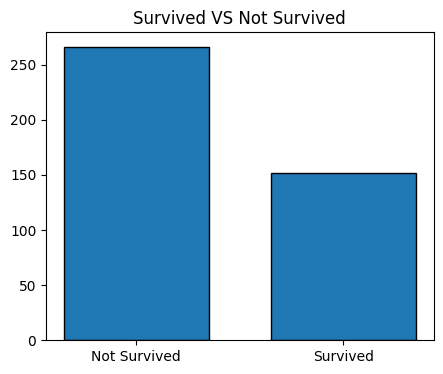

In [243]:
plt.figure(figsize=(5,4))
plt.title("Survived VS Not Survived")
plt.bar(['Not Survived','Survived'],titanic_df['Survived'].value_counts(),edgecolor='k',width=0.7)
plt.show()

<AxesSubplot: >

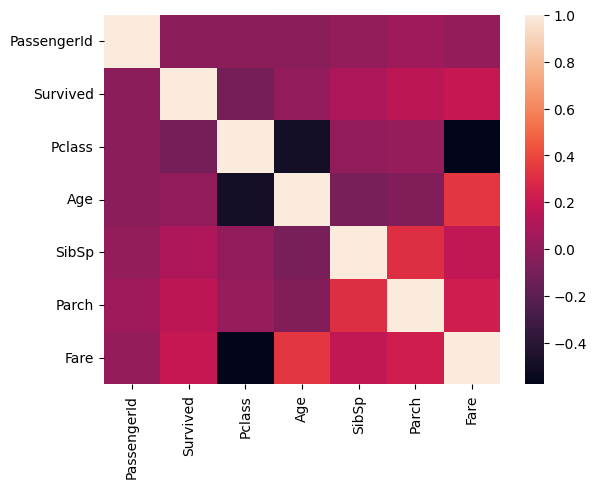

In [244]:
corr = df.corr()
sns.heatmap(corr)

### Convert categorical fields (Sex & Embarked)

In [245]:
titanic_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


### Dividing the dataframe into two seperate dataframes:

In [246]:
X = titanic_df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_df['Survived']

### Cheking X & Y

In [247]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         2
1         3    0  47.00000      1      0    7.0000         0
2         2    1  62.00000      0      0    9.6875         2
3         3    1  27.00000      0      0    8.6625         0
4         3    0  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         0
414       1    0  39.00000      0      0  108.9000         1
415       3    1  38.50000      0      0    7.2500         0
416       3    1  30.27259      0      0    8.0500         0
417       3    1  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [248]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### Training and testing sets:

In [249]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


### Traning model:

In [250]:
# Logistic regression is used to predict the categorical dependent variable. It's used because the prediction here is either survived or not.

# Null values are not accepted.

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Evaluation

In [251]:
# Accuracy of traning data

X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1]


In [252]:
Training_Data_Accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', Training_Data_Accuracy)

Accuracy score of training data :  1.0


In [253]:
# Accuracy of testing data

X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 0 0]


In [254]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


### Prediction Time

In [255]:
arr=np.array([[5,1,50,3,1,7.5000,0]])
prediction=model.predict(arr)
print(prediction)

[0]


## The prediction of person that have:
## 'Pclass-5' , Sex-1 ,Age-50yrs, SibSp-3, Parch-1, Ticket Fare-7.5000, Embarked-0
## is not survived (0)